# MATH 481A - Spring 2022
## Numerical Analysis

Jorge Balbas

<hr>

# Lab Assignment #3: Zernike Polynomials

<hr>

## Goals:

In this lab you will write **four functions** to calculate the values of Zernike polynomials over the unit disk and plot them.

<br>
<hr>

## Due Date: Thursday 4/28/22

<br>
<hr>

## Directions:

1. Complete the six problems below<br><br>

1. Save the modified notebook<br><br>

1. Upload it to canvas<br><br>

<hr>

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math

<hr>

## Zernike Polynomials:

Even and odd Zernike Polynomials are defined respectively as
<br>

$$ \label{eq:zernike}
Z_n^m(\rho,\theta) = R_m^n(\rho) \cos{(m \theta)} \ \ \ \ \ \text{and} \ \ \ \ \ Z_n^{-m}(\rho,\theta) = R_m^n(\rho) \sin{(m \theta)},
$$

<br>
where $n,m \in \mathbb{Z}$, $n \geq m \geq 0$, $\theta$ is the *azimuthal angle*, $\rho$ the radial distance, and $R_n^m(\rho)$ the radial polynomials given by:
<br><br>

$$ \label{eq:zernikeR}
R_n^m(\rho) = \left\{ \begin{array}{cc} \sum \limits_{k = 0}^{\frac{n-m}{2}} (-1)^k \begin{pmatrix} n - k \\ k \end{pmatrix} \begin{pmatrix} n - 2k \\ \frac{n - m}{2} - k \end{pmatrix} \rho^{n - 2k} & \ \text{if} \ n - m \ \ \text{even} \\[0.3in] 0 & \ \text{if} \ n - m \ \ \text{odd} \end{array} \right.
$$

<br>
They satisfy $|Z_n^m(\rho,\theta)| \leq 1$ for all $\rho \in (0,1)$, and all $\theta$.

<hr>

## Problem #1 (20 Points)

<br>
Show that the radial polynomials satisfy the recurrence relation
<br>

$$
R_{n}^{m} (\rho) +  R_{n-2}^{m} (\rho)= \rho \left[ R_{n-1}^{|m - 1|}(\rho)  + R_{n-1}^{m + 1}(\rho) \right].
$$


<hr>

## Problem #2 (20 points)

Show that the radial polynomials are orthogonal with respect to the inner product
<br>

$$
\langle R_{n}^{m}, R_{n'}^{m}\rangle = \int_{0}^{1} \rho \, \sqrt{2n + 2} \, R_{n}^{m}(\rho) \, \sqrt{2n' + 2} \, R_{n'}^{m}(\rho) \, d\rho
$$


<hr>    

## Problem #3 (20 points)

Write a function named <tt>zernike_Rcoeffs</tt> that takes as input $n$ and $m$ and returns the coefficients of $R_{n}^m(\rho)$ as a 1d array of size $n+1$. Test your code by finding the coefficients of the radial polynomials for $n = 0, 1, 2$, and the corresponding admissible values of $m$.

**Note:** Some of the coefficients are zero (coefficients of odd powers for $n$ even and of even powers for $n$ odd). That's ok.

<hr>

In [16]:
def zernike_Rcoeffs(n,m):
    coeff = np.zeros(n+1, int)

    if (n - m)%2 == 0:
        for k in range(0, int((n - m)/2) + 1):
            coeff[n - 2*k] = ((-1)**k*math.factorial(n-k))/(math.factorial(k)*math.factorial((n + m)//2-k )*math.factorial((n - m)//2-k))
    return coeff

<hr>    

## Problem #4 (20 points)

Write two functions named <tt>zernike_even</tt> and <tt>zernike_odd</tt> that take as input $n$, $m$, $\rho$, and $\theta$, where $[\rho, \theta]$ represents the mesh grid $[0,1] \times [0,2 \pi]$, and return, respectively, $Z_{n}^{m}(\rho,\theta)$ and $Z_{n}^{-m}(\rho,\theta)$. This functions should call <tt>zernike_Rcoeffs</tt> and use its output to evaluate the polynomials over $[0,1] \times [0,2 \pi]$.

<hr>

In [17]:
def zernike_even(n,m,Theta,Rho):
    c = zernike_Rcoeffs(n,m)
    R  = np.zeros(Theta.shape, float)

    for k in range(0,n+1):
        R += c[k]*Rho**k
    Z = R*np.cos(m*Theta)
    return Z

def zernike_odd(n,m,Theta,Rho):
    c = zernike_Rcoeffs(n,m)
    R = np.zeros(Theta.shape, float)

    for k in range(0,n+1):
        R += c[k]*Rho**k
    Z = R*np.sin(n*Theta)
    return Z

<hr>

## Problem #5 (20 points)

Write a function named <tt>zernike_pplots</tt> that for given $n$ and $m$:

1. generates 1d arrays $0 \leq \rho \leq 1$ and $0 \leq \theta \leq 2 \pi$ with 201 and 41 points respectively<br><br>

1. generates the mesh grid $[0,1] \times [0,2 \pi]$ from the 1d arrays in (a) <br><br>

1. calls <tt>zernike_even</tt> and <tt>zernike_odd</tt> <br><br>

1. produces polar plots of $Z_{n}^{m}(\rho,\theta)$ and $Z_{n}^{-m}(\rho,\theta)$ over the unit disk<br><br>

Test your funtion by plotting $Z_n^{\pm m}(\rho, \theta)$ for $n = 0, 1, 2, 3$ and the corresponding admissible values of $m$. You can skip the odd polynomial when $m = 0$ for $n$ even.<br>

<hr>

In [18]:
def zernike_pplots(n, m):

    rho = np.linspace(0,1,201)
    theta = np.linspace(0,2*math.pi,41)

    [Theta,Rho] = np.meshgrid(theta,rho)
    Znme = zernike_even(n,m,Theta,Rho)
    Znmo = zernike_odd(n,m,Theta,Rho)

    fig1, ax1 = plt.subplots(subplot_kw = dict(projection='polar'))
    ax1.axis('off')
    ax1.contourf(Theta, Rho, Znme, 100, cmap = 'RdBu')
    fig2, ax2 = plt.subplots(subplot_kw = dict(projection='polar'))
    ax2.axis('off')
    ax2.contourf(Theta, Rho, Znmo, 100, cmap = 'RdBu')


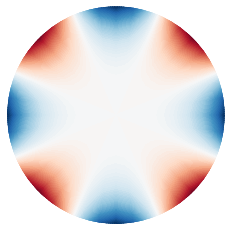

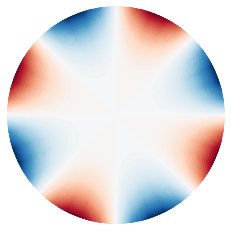

In [19]:
zernike_pplots(4,4)

<hr>

## Problem #6 (50 points) -- Extra Credit

Write a function named <tt>zernike_piramide</tt> that takes as input $n$ and creates the image below consisting of contour plots of the Zernike polynomials for $k = 0, 1, \dots, n$.<br><br>

You will need:

1. to create:<br><br>

    1. two <tt>numpy</tt> arrays <tt>rho</tt> and <tt>theta</tt> of size $1 \times 41$ for the intervals $\rho \in [0,1]$ and $\theta \in [0, 2\pi]$,<br><br>
    
    1. the grid <tt>[Theta, Rho] = np.meshgrid(theta, rho)</tt>, and<br><br>
    
    1. a figure, <tt>fig</tt>, with an $(n + 1) \times (2n + 1)$ array, <tt>ax</tt>, of polar subplots<br><br>

1. to loop <tt>k in range (0, n+1),</tt> and consider three cases:<br><br>

    1. <tt>if k == 0:</tt> <br><br>
        1. calculate $Z_k^0(\theta, \rho)$ - call <tt>zernike_even(k, 0, Theta, Rho)</tt> <br><br>
        
        1. plot its contour on <tt>ax[0,n]</tt><br><br>
        
        1. delete all axis from the plots in that row <tt>ax[0,j]</tt> for <tt> j = 0, 1, ..., 2*n + 1</tt><br><br>
        
    2. <tt>elif k % 2 == 0:</tt> <br><br>
        
        1. find the set of admissible values of $m$ for $k$ and store them into an array <tt>m = np.arange(...)</tt> <br><br>
        
        1. for each of those m, calculate $Z_k^m(\theta, \rho)$ and $Z_k^{-m}(\theta, \rho)$ - call <tt>zernike_even(k, 0, Theta, Rho)</tt> and <tt>zernike_odd(k, 0, Theta, Rho)</tt>, and <br><br>
        
        1. plot their contours on <tt>ax[0, #]</tt> and <tt>ax[0, #]</tt> <br><br>
        
        1. repeat the above two steps for $Z_k^0$, plotting it on <tt>ax[0, n]</tt> <br><br>
        
        1. delete all axis from the plots in that row <tt>ax[0,j]</tt> for <tt> j = 0, 1, ..., 2*n + 1</tt><br><br>
        
    3. <tt>else:</tt><br><br>
    
        1. find the set of admissible values of $m$ for $k$ and store them into an array <tt>m = np.arange(...)</tt> <br><br>
        
        1. for each of those m, calculate $Z_k^m(\theta, \rho)$ and $Z_k^{-m}(\theta, \rho)$ -- call <tt>zernike_even(k, 0, Theta, Rho)</tt> and <tt>zernike_odd(k, 0, Theta, Rho)</tt>, and <br><br>
        
        1. plot their contours on <tt>ax[0, #]</tt> and <tt>ax[0, #]</tt> <br><br>
        
        1. delete all axis from the plots in that row <tt>ax[0,j]</tt> for <tt> j = 0, 1, ..., 2*n + 1</tt><br>

<hr>

In [20]:
def zernike_piramid(n):
    
    #####################
    # Part 1 -- 
    #####################
    
    # Part 1.A:
    
    rho = np.linspace(0,1,41)
    theta = np.linspace(0,2*math.pi,41)

    # Part 1.B:
    
    [Theta, Rho] = np.meshgrid(theta, rho)
    
    # Part 1.C:
    
    fig, ax = plt.subplots(n+1, 2*n+1, figsize = (4*(2*n+1), 4*n), subplot_kw = dict(projection='polar'))
    fig.subplots_adjust(wspace = -0.92)
    
    #####################
    # Part 2 --  
    #####################
    
    for k in range(0,n+1):
        
        # Part 2.A:
        
        if k == 0:
            
            # Part 2.A.a:
            
            Znme = zernike_even(k, 0, Theta, Rho)
            
            # Part 2.A.b:
            
            ax[0,n].contourf(Theta, Rho, Znme, 100, cmap = 'RdBu')
            
            
            # Part 2.A.c:
            
            for j in range(0,2*n+1):
                ax[0,j].axis('off')
            
        # Part 2.B:
        
        elif k % 2 == 0:
            
            # Part 2.B.a:
            
            m = np.arange(0, k+1, 2)
             
            mi = m[-1]
            row = k
            col = n - mi
            
            while mi > 0:
                
                # Part 2.B.b:
                
                Znme = zernike_even(k, mi, Theta, Rho)
                Znmo = zernike_odd(k, mi, Theta, Rho)
                
                # Part 2.B.c:
                
                ax[row,col].contourf(Theta, Rho, Znme, 100, cmap = 'RdBu')
                ax[row,2*n - col].contourf(Theta, Rho, Znmo, 100, cmap = 'RdBu')
                
                col += 2
                mi -= 2
                
                # Part 2.B.d:
                
                if mi == 0:
                    Znme = zernike_even(k, 0, Theta, Rho)
                    ax[row, n].contourf(Theta, Rho, Znme, 100, cmap = 'RdBu')
                    
            # Part 2.B.e:
            
            for j in range(0,2*n+1):
                ax[k,j].axis('off')

        # Part 2.C:
        
        else:
            
            # Part 2.C.a:
            
            m = np.arange(1, k+1, 2)
            
            mi = m[-1]
            row = k
            col = n - mi
            
            while mi > 0:
                
                # Part 2.C.b:
                
                Znme = zernike_even(k, mi, Theta, Rho)
                Znmo = zernike_odd(k, mi, Theta, Rho)
                
                
                # Part 2.C.c:

                ax[row,col].contourf(Theta, Rho, Znme, 100, cmap = 'RdBu')
                ax[row,2*n - col].contourf(Theta, Rho, Znmo, 100, cmap = 'RdBu')
                col += 2
                mi -= 2
                
            # Part 2.C.d:
            
            for j in range(0,2*n+1):
                ax[k,j].axis('off')

    return fig, ax

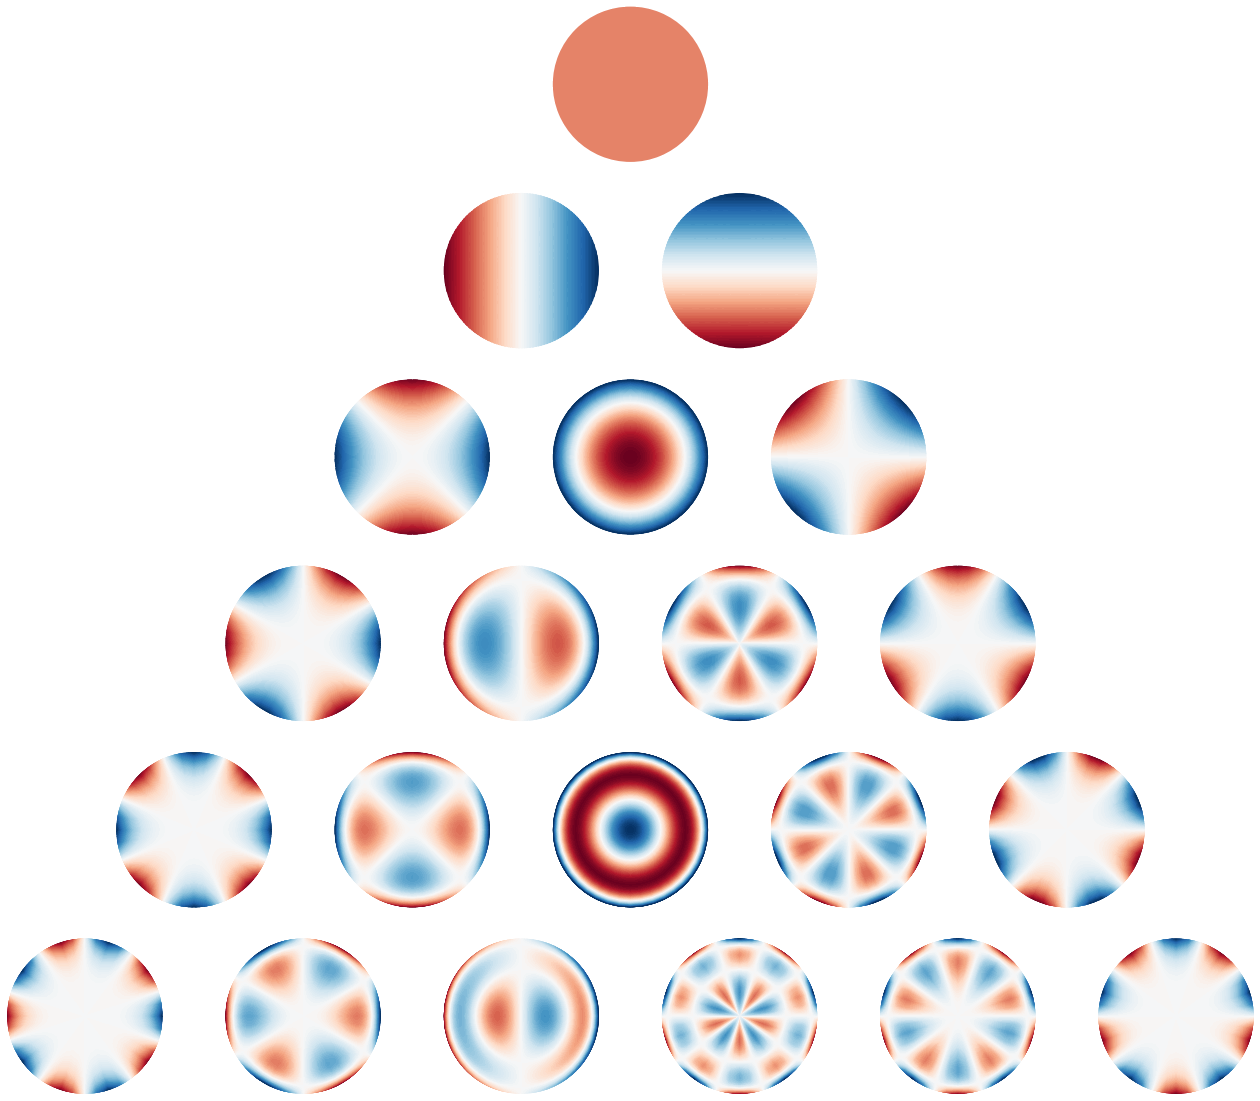

In [21]:
fig, ax = zernike_piramid(5)